<a href="https://colab.research.google.com/github/PedroDS4/l1_norm_inversion_method_for_deconvolution_in_attenuating_media/blob/main/paper_l1_norm_inversion_method_for_deconvolution_in_attenuating_media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pywavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 21.1 MB/s eta 0:00:00


#**Deconvolução de traços sísmicos em meio atenuante**

A deconvolução é o processo de inverter os resultados de uma convolução em um sistema linear e invariante no tempo(LIT), onde ja é conhecido o resultado final de uma convolução pela qual o sistema alterou a entrada.
O sistema físico que representa o problema da sísmica de reflexão pode ser modelado como um sistema LIT causal que pode ser representado pela equação de convolução

$$
x(t) = r(t) * w(t) = ∫_{-∞}^{∞}r(\tau)w(t-\tau)d\tau
$$

no domínio da frequência, essa equação se torna

$$
X(\omega) = R(\omega) W(\omega)
$$

Onde $x(t)$ é o traço sísmico obtido pelos receptores, $r(t)$ é a refletividade ou resposta ao impulso modelada da superfície, e $w(t)$ é o pulso gerado pela fonte sonora.

Porém em um meio atenuante, existem modelos que transformam esse modelo convolucional em um modelo convolucional não estacionário, em que o operador que representa a wavelet agora é uma convolução não estacionária com entre um sinal que representa a atenuação e a própria wavelet, desse modo temos

O modelo convolutivo com atenuação é dado por uma convolução não estacionária, seguida de uma convolução estacionária

$$
x(t) = w(t) \ast a(t,\tau) \circledast r(t)
$$


analiticamente temos que

$$
x(t) = w(t) \ast \int_{-\infty}^{\infty} a(t-\tau,\tau)r(\tau)d\tau
$$

aplicando a transformada de fourier dos dois lados

$$
X(\omega) = \mathcal{F}\{\  w(t) \ast \int_{-\infty}^{\infty} a(t-\tau,\tau)r(\tau)d\tau  \}\
$$

pla propriedade da convolução na frequência, temos

$$
X(\omega) = W(\omega) \cdot \mathcal{F}\{\  \int_{-\infty}^{\infty} a(t-\tau,\tau)r(\tau)d\tau  \}\
$$

desenvolvendo a transformada de fourier

$$
\mathcal{F}\{\  \int_{-\infty}^{\infty} a(t-\tau,\tau)r(\tau)d\tau  \}\ = \int_{-\infty}^{\infty}  \int_{-\infty}^{\infty} a(t-\tau,\tau)r(\tau)d\tau e^{-i \omega t} dt
$$

podemos agora reverter a ordem da transformada, como segue

$$
\int_{-\infty}^{\infty}  (\int_{-\infty}^{\infty} a(t-\tau,\tau) e^{-i \omega f t} dt ) r(\tau) d\tau
$$

nomeando agora

$$
t- \tau = T  => t = T + \tau => dt = dT
$$

então ficamos com

$$
\int_{-\infty}^{\infty}  (\int_{-\infty}^{\infty} a(T,\tau) e^{-i \omega T} dT ) r(\tau) e^{-i \omega \tau}  d\tau
$$

o termo dentro do parênteses se refere a transformada de fourier do sinal de atenuação, então

$$
\int_{-\infty}^{\infty} a(T,\tau) e^{-i \omega T} dT = A(f,\tau)
$$

assim o espectro do traço sísmico se torna

$$
X(\omega) = W(\omega) \cdot \int_{-\infty}^{\infty} A(\omega,\tau) r(\tau) e^{-i \omega \tau}  d\tau
$$

o termo

$$
\int_{-\infty}^{\infty} A(\omega,\tau) r(\tau) e^{-i \omega \tau}  d\tau
$$

pode ser visto como uma transformada de fourier da refletividade que já leva em conta a atenuação das camadas geológicas, e ainda podemos decompor o termo de atenuação como um número complexo na forma polar, dado por

$$
A(\omega,\tau) = |A(\omega,\tau)| e^{i \phi(\omega,\tau)}
$$

e o espectro de amplitude pode ainda ser representado por outra exponencial, da forma

$$
|A(\omega,\tau)| = e^{\psi(\omega,\tau)}
$$


então o termo de atenuação se torna

$$
A(\omega,\tau) = e^{ \psi(\omega,\tau) + i\phi(\omega,\tau)} = e^{\theta(\omega,\tau)}
$$


assim o modelo convolucional não estacionário no domínio da frequência finalmente se torna


$$
X(\omega) = W(\omega) \cdot \int_{-\infty}^{\infty} r(\tau) e^{-i \omega \tau + \theta(\omega,\tau)}  d\tau
$$

que pode ser colocado numa forma compacta como

$$
X(\omega) = W(\omega) R(\mathbf{Q},\omega)
$$


**Refletividade com Atenuação**
Normalmente a atenuação é jogada para a wavelet, porém nesse artigo ela é colocada para a refletividade e seu j-ésimo coeficiente de sua transformada de fourier atenuada é dada por

$$
R(\omega_j) = \sum_{l = 1}^{K} r_l e^{i \omega_j l \Delta \tau + \theta_l (\omega_j)}
$$


Assim o traço sísmico atenuado é escrito como

$$
X(\omega_j) = W(\omega_j) \cdot \sum_{l = 1}^{K} r_l e^{i \omega_j \Delta \tau + \theta_l (\omega_j)}
$$

que pode ser visto ainda como

$$
X(\omega_j) = \sum_{l = 1}^{K}  r_l  W(\omega_j) e^{i \omega_j l \Delta \tau + \theta_l (\omega_j)} = \sum_{l = 1}^{K}  M_{j,l} r_l
$$

que equivale a uma multiplicação de matrizes da forma

$$
X(\omega_j) = \sum_{l = 1}^{K}  r_l  W(\omega_j) e^{i \omega_j l \Delta \tau + \theta_l (\omega_j)}
$$

termo $\theta_m(\omega)$ é dado pelo modelo de atenuação, como por exemplo o modelo de Kjartansson, dado por

$$
\theta_m(\omega) = \omega \Delta \tau [ i \cdot ln(\frac{\omega_0}{\omega}) - \frac{1}{2} ] \sum_{n = 1}^{m} \frac{1}{Q_n}
$$


então o espectro do dado é modelado matricialmente por

$$
\mathbf{X = Mr}
$$


##**Estimativa por média móvel**
Uma técnica muito conhecida para a estimação da wavelet em um ambiente de alta SNR e fase mínima, é a suavização do espectro de magnitude do traço sísmico, essa suavização é feita com um filtro de média móvel.

Seja o espectro de magnitude do traço sísmico dado por

$$
A(f) = |X(f)|
$$

e o filtro de média móvel, na frequência

$$
M_a(f) = \frac{1}{M} rect_M(f) =  \frac{1}{M}, 0 \leq n \leq M
$$

assim, temos que o espectro da wavelet suavizada discreta, será dada por

$$
W(k) = M_a(k) \ast |X(k)| = \frac{1}{M} \sum_{p = 0}^{M-1} |X(k - p)|
$$



##**Deconvolução por mínima norma $l_1$ em meio atenuante**
A deconvolução por norma $l_2$ pode ser feita utilizando otimização, e minimizando a seguinte função objetivo

$$
J\mathbf{(r)} = ||\mathbf{X} - \mathbf{Mr}||_1 + \mu ||\mathbf{r}||_1
$$


**Suavização da norma $l_1$**

A norma l1 é uma função que não é suave e pode ter variações bruscas, a mesma coisa pra sua derivada, que por partes é a função sinal, então é proposto uma suavização da mesma, partindo da igualdade

$$
||\vec{v}||_1 = \lim_{\epsilon \to 0} \sum_{i = 1}^{N} \sqrt{v_i^2 + \epsilon^2} = \sum_{i = 1}^{N} \lim_{\epsilon \to 0} \sqrt{v_i^2 + \epsilon^2} = \sum_{i = 1}^{N} |v_i|
$$

então assim temos que

$$
||\vec{v}||_1  \approx  \sum_{i = 1}^{N} \sqrt{v_i^2 + \epsilon^2}
$$

para valores de $ϵ$ pequenos.


Agora nomeando a diferença dentro da primeira norma $l_1$ como o erro de predição, temos

$$
\mathbf{X} - \mathbf{Mr} = \mathbf{E}
$$

a função objetivo fica

$$
J\mathbf{(r)} = ||\mathbf{E(\mathbf{r})}||_1 + \mu ||\mathbf{r}||_1
$$

substituindo a norma l1 por sua aproximação, temos

$$
J\mathbf{(r)} = \sum_{i}^{} \sqrt{|E_i|^2 + \epsilon^2} + \mu  \sum_{i}^{} \sqrt{r_i^2 + \epsilon^2}
$$


derivando temos ainda


$$
\frac{ \partial}{\partial r_n} J\mathbf{(r)} = \frac{ \partial}{\partial r_n}  \sum_{i}^{} \sqrt{|E_i|^2 + \epsilon^2} + \mu  \sum_{i}^{} \sqrt{r_i^2 + \epsilon^2}
$$

a derivada da norma l1 suavizada é dada por

$$
\frac{ \partial}{\partial r_n} \sum_{i}^{} \sqrt{r_i^2 + \epsilon^2} = \sum_{i}^{} \frac{2 r_n}{2 \sqrt{r_i^2 + \epsilon^2}}
$$


a derivada da norma l1 do erro é feita utilizando a regra da cadeia, então temos

$$
\frac{ \partial}{\partial r_n}  \sum_{i}^{} \sqrt{|E_i|^2 + \epsilon^2}  =   \sum_{i}^{} \frac{\frac{ \partial}{\partial r_n} |E_i|^2 }{2\sqrt{|E_i|^2 + \epsilon^2} }
$$

agora utilizando que o módulo de um número complexo pode ser calculado como

$$
|z|^2 = z \cdot \bar{z}
$$

temos que

$$
|E_i|^2 = E_i \cdot \bar{E_i}
$$

agora a derivada fica

$$
\frac{ \partial}{\partial r_n} E_i \cdot \bar{E_i}
$$

utilizando ainda a regra do produto

$$
E_i \frac{ \partial}{\partial r_n} \bar{E_i} +  \bar{E_i} \frac{ \partial}{\partial r_n} E_i
$$


e o i-ésimo termo do vetor $\mathbf{E}$ é dado por

$$
 E_i = (\mathbf{X} - \mathbf{Mr})_i =  (\mathbf{X}_i - \sum_{l} \mathbf{M_{i,l} r_l})
$$

Então sua derivada se torna

$$
\frac{ \partial}{\partial r_n}  E_i = \frac{ \partial}{\partial r_n}  (\mathbf{X}_i - \sum_{l} \mathbf{M_{i,l} r_l}) = - \frac{ \partial}{\partial r_n} \sum_{l} \mathbf{M_{i,l} r_l} = -\mathbf{M_{i,n}}
$$

e temos que tanto a operação de derivada tanto a operação de conjugado é linear, então podemos inverter suas ordens


$$
\frac{d}{d z}  \overline{\alpha z}  = \overline{\frac{d}{d z}  \alpha z  } = \overline{\alpha}
$$

e a derivada do conjugado fica

$$
\frac{ \partial}{\partial r_n} \bar{E_i} = \frac{ \partial}{\partial r_n} \overline{ \mathbf{X}_i - \sum_{l} \mathbf{ M_{i,l} r_l} } = -\frac{ \partial}{\partial r_n} \sum_{l} \overline { \mathbf{ M_{i,l} r_l} }  = - \overline{\mathbf{ M_{i,n}}}
$$

então temos que

$$
\frac{ \partial}{\partial r_n} E_i \cdot \bar{E_i}  = E_i \cdot - \overline{\mathbf{ M_{i,n}}} + \bar{E_i} \cdot - \mathbf{ M_{i,n}}
$$

agora podemos simplificar utilizando as seguintes propriedades dos conjugados

$$
\bar{z_1} z_2 = \overline{ z_1 \bar{z_2} }
$$

$$
z + \bar{z} = 2Re\{\ z \}\
$$

então podemos simplificar como

$$
- (E_i \cdot \overline{\mathbf{ M_{i,n}}} + \bar{E_i} \cdot \mathbf{ M_{i,n}}) =-(E_i \cdot \overline{\mathbf{ M_{i,n}}} + \overline{E_i \cdot \overline{\mathbf{ M_{i,n}}}} ) = -2Re\{\ E_i \overline{\mathbf{M_{i,n}}} \}\
$$

e ainda substituindo o vetor de erro

$$
-2Re\{\ E_i \overline{\mathbf{M_{i,n}}} \}\ = -2Re\{\ ( \mathbf{X}_i - \sum_{l} \mathbf{ M_{i,l} r_l} ) \overline{\mathbf{M_{i,n}}} \}\ = -2Re \{\  \mathbf{X}_i \overline{\mathbf{M_{i,n}}} \}\ + 2Re \{\ \sum_{l} \mathbf{ M_{i,l} r_l} \overline{\mathbf{M_{i,n}}} \}\
$$

então a derivada total pode finalmente ser escrita como

$$
\frac{ \partial}{\partial r_n} J\mathbf{(r)} = \sum_{i}^{} \frac{ -2Re \{\  \mathbf{X}_i \overline{\mathbf{M_{i,n}}} \}\ + 2Re \{\ \sum_{l} \mathbf{ M_{i,l} r_l} \overline{\mathbf{M_{i,n}}} \}\ }{2\sqrt{|E_i|^2 + \epsilon^2} } + \mu \sum_{i}^{} \frac{2 r_n}{2 \sqrt{r_i^2 + \epsilon^2}}
$$

Agora separando cada termo, temos ainda

$$
\frac{ \partial}{\partial r_n} J\mathbf{(r)} = \sum_{i}^{} \frac{ 2Re \{\ \sum_{l} \mathbf{ M_{i,l} r_l} \overline{\mathbf{M_{i,n}}} \}\ }{2\sqrt{|E_i|^2 + \epsilon^2} } + \mu \sum_{i}^{} \frac{2 r_n}{2 \sqrt{r_i^2 + \epsilon^2}} -     \sum_{i}^{} \frac{ 2Re \{\  \mathbf{X}_i \overline{\mathbf{M_{i,n}}} \}\  \}\ }{2\sqrt{|E_i|^2 + \epsilon^2} }
$$

que pode ser escrita ainda como um produto de matrizes da forma

$$
\nabla J(\mathbf{r} ) = Re\{\ \mathbf{M}^H \mathbf{A} \mathbf{Mr} \}\ + \mu \mathbf{Br} -  Re\{\ \mathbf{M}^H \mathbf{AX} \}\ = \mathbf{0}
$$

Colocando a refletividade em evidência, a equação final do ponto de mínimo se torna

$$
 Re \{\ \mathbf{M}^H \mathbf{A} \mathbf{M} + \mu \mathbf{B} \}\  \mathbf{r} =  Re\{\ \mathbf{M}^H \mathbf{AX} \}\
$$

Que pode ser visto como um sistema de equações não lineares, uma vez que as matrizes dependem da refletividade não linearmente.

As matrizes A e B são matrizes diagonais, da forma

$$
A_{i,i} = \frac{1}{ \sqrt{|E_i|^2 + \epsilon^2}}
$$

e

$$
B_{i,i} = \frac{1}{ \sqrt{r_i^2 + \epsilon^2}}
$$

Esse sistema de equações não lineares pode ser resolvido iterativamente, gastando menos custo computacional do que um algorítmo de otimização, por exemplo.

**Resolução do sistema de equações**

O sistema de equações para a refletividade pode ser resolvido pela própria equação, primeiro nomeamos os termos

$$
\mathbf{P}(\mathbf{r}) =  Re \{\ \mathbf{M}^H \mathbf{A}(\mathbf{r}) \mathbf{M} + \mu \mathbf{B}(\mathbf{r}) \}\
$$

e

$$
\mathbf{z}(\mathbf{r}) = Re\{\ \mathbf{M}^H \mathbf{AX} \}\
$$

então o sistema de equações assume a forma compacta

$$
\mathbf{P}(\mathbf{r})  \mathbf{r} = \mathbf{z}(\mathbf{r})
$$

que pode ser resolvido iterativamente pela equação:

$$
 \mathbf{r}^{k+1} = [\mathbf{P}(\mathbf{r^k})]^{-1} \mathbf{z}(\mathbf{r^k})
$$



##**Deconvolução por mínimo erro médio quadrático em meio atenuante**





**Referências**

* OLIVEIRA, S. A. M.; LUPINACCI, W. M. L1 norm   
  inversion method for deconvolution in attenuating media.  North Fluminense State University.  Petroleum Exploration and Production Laboratory Macae.  RJ, Brazil and Inversion Geophysics.  https://doi.org/10.1111/1365-2478.12002


* Ergun, Erhan (2019). Non-stationary Iterative
  Time-Domain Deconvolution for Enhancing the Resolution of Shallow Seismic Data. Purdue University Graduate School. Thesis. https://doi.org/10.25394/PGS.8126687.v1





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.fftpack import fft, ifft
from scipy.linalg import toeplitz
from scipy.signal import convolve
from scipy.signal import correlate
from scipy import signal
import pywt

#Funções Auxiliares

# Funções de Plotagem
def plot_completo(nome_x, nome_y, nome_grafico, cor, vetor_y, vetor_x = None):
    """
    Função de plotagem com dados e modelo
    nome_x: Nome do eixo x
    nome_y: Nome do eixo y
    nome_grafico: Nome do gráfico
    cor: cor da linha do gráfico
    vetor_y: Vetor de dados do eixo y
    vetor_x: Vetor de dados do eixo x( caso não seja passado a função plota de modo discreto e interpola)
    """
    fig, ax = plt.subplots()
    ax.set(xlabel=nome_x, ylabel=nome_y, title=nome_grafico)
    if vetor_x is None:
        ax.plot(vetor_y,cor)
    else:
        ax.plot(vetor_x, vetor_y, cor)


    ax.grid()



##################################################################################################################################################################################################################################################

eps = np.finfo(float).eps
#Geração dos dados sísmicos
def gerar_reletividade_aleatoria(M,s):
  #M: número de amostras da refletividade
  #s: Espaçamento entre as amostras não nulas
  #A função np.random.binomial corrige o fato dos impulsos da refletividade ficarem igualmente espaçados
  refletividade = np.zeros(M)
  for i in range(5,M-5,s):
    refletividade[i] = (np.random.uniform(-1,1))*np.random.binomial(1,0.8)

  return refletividade


def ricker_wavelet(f0, t):
  #f0: Frequência central da wavelet de ricker
  #t: eixo temporal que a wavelet é calculada
  ricker_wavelet = (1 - 2 * (np.pi**2) * (f0**2) * (t**2)) * np.exp(-(np.pi**2) * (f0**2) * (t**2))

  return ricker_wavelet



################################################################################
#Função que gera a matriz de convolução
def conv_matrix(ww, NN, DD = None):
    """
    Gera uma matriz de convolução a partir de um vetor de pesos.

    A função cria uma matriz onde cada coluna é uma versão deslocada do vetor de
    pesos, permitindo realizar operações de convolução em um sinal.

    Parâmetros:
    ----------
    ww : array-like
        Um vetor unidimensional de pesos ou coeficientes a serem usados na
        convolução.

    NN : int
        O número de colunas desejadas na matriz de convolução, que geralmente
         corresponde à largura da janela de convolução.

    DD : int, opcional
        A profundidade da matriz de convolução. Se não for fornecida, assume-se
        que DD é igual a NN. Se DD for maior que o comprimento de ww, o vetor
        será preenchido com zeros na parte inferior.

    Retorna:
    --------
    HH : ndarray
        Uma matriz 2D (DD, NN) onde cada coluna é o vetor de pesos 'ww'
        deslocado por uma quantidade específica. O tamanho da matriz é definido
         por DD e NN.

    Exemplo:
    --------
        ww = np.array([1, 2, 3])
        NN = 9
        DD = 11
        result = conv_matrix(ww, NN, DD)
        print(result)

        [[1. 0. 0. 0. 0. 0. 0. 0. 0.]
        [2. 1. 0. 0. 0. 0. 0. 0. 0.]
        [3. 2. 1. 0. 0. 0. 0. 0. 0.]
        [0. 3. 2. 1. 0. 0. 0. 0. 0.]
        [0. 0. 3. 2. 1. 0. 0. 0. 0.]
        [0. 0. 0. 3. 2. 1. 0. 0. 0.]
        [0. 0. 0. 0. 3. 2. 1. 0. 0.]
        [0. 0. 0. 0. 0. 3. 2. 1. 0.]
        [0. 0. 0. 0. 0. 0. 3. 2. 1.]
        [0. 0. 0. 0. 0. 0. 0. 3. 2.]
        [0. 0. 0. 0. 0. 0. 0. 0. 3.]]
    """
    MM = len(ww)

    if DD is None:
        DD = NN
        aux_shift = MM//2
    else:
        aux_shift = 0


    ww_pad = np.pad(ww, (0, DD + MM), 'constant')

    HH = np.zeros((DD, NN),dtype = ww.dtype)

    for nn in range(NN):
         aux_vect = np.roll(ww_pad, nn-aux_shift)
         HH[:, nn] = aux_vect[:DD]

    return HH



def moving_average_filter(x, M):
    """Aplica um filtro de média móvel a um sinal x com janela de tamanho M."""
    kernel = np.ones(M) / M  # Criando o kernel da média móvel
    x_soft = np.convolve(x, kernel, mode='same')  # Convolução com 'same' para manter o tamanho original
    return x_soft



def estimate_wavelet(x,L,M):
    """
    Parâmetros:
    Traço Sísmico em que será estimada a wavelet: x
    Tamanho da janela da média móvel que controla o tamanho da suavização: M
    Tamanho da Wavelet requerida: L

    Retorna:
    Espectro estimado da wavelet

    """

    N = len(x)

    X_f = np.abs( np.fft.fft(x) )[0:N//2]

    x_soft = moving_average_filter(X_f,M)

    W_f_est = x_soft



    w_t_est = np.fft.fftshift ( np.fft.irfft(W_f_est) )

    # Truncamento para deixar o tamanho da wavelet igual a L
    centro = N // 2

    w_t_est = w_t_est[centro - (L // 2): centro + (L // 2)+1]

    w_t_est = w_t_est/np.max(np.abs(w_t_est))

    return w_t_est



def smooth_l1_abs(v,eps):
  l1 = np.sqrt( np.abs(v)**2 + eps**2)
  return l1



def smooth_l1_norm(v,eps):
  s_l1 = np.sum( np.sqrt( np.abs(v)**2 + eps**2 ))
  return s_l1



def theta_l(omega_0,omega,dt,Q,l):
  theta = omega * dt * (1j *np.log(omega_0/omega) - 0.5)*np.sum(1/Q[0:l])
  return theta



def l1_norm_atenuated_deconvolution(x,wavelet, omega_0,Q_vector, dt, n_iter ,mu):

  N = len(x)

  W_f = (np.fft.fft(wavelet,N))
  X_f = (np.fft.fft(x))

  omega = np.arange(0,N)
  eps = 0.01

  #Relação entre período de amostragem e resolução de frequências
  #T_0/Ts = N => F_0 = 1/(Ts * N)
  F_0 = 1/(dt*N)
  omega = np.arange(0,N)*2*np.pi*F_0

  time_index = np.arange(0,N)


  #Matriz de atenuação M
  M = np.zeros((N,N), dtype = complex)
  for j in range(N):
      for l in range(N):
          if omega[j] != 0:
            M[j][l] = W_f[j] * np.exp( 1j*omega[j]*l*dt  + theta_l(omega_0,omega[j],dt,Q_vector,l) )

  M_h = np.conj(M.T)


  #Inicialização dos vetores importantes
  r_est = x
  A = np.zeros((N,N))
  B = np.zeros((N,N))

  #Erro inicial
  E = X_f - M@r_est

  A = np.diag( 1/smooth_l1_abs(E,eps) )
  B = np.diag( 1/smooth_l1_abs(r_est,eps) )

  J_r = np.zeros(n_iter)
  for i in range(n_iter):

      #Erro da iteração atual
      E = X_f - M@r_est

      J_r[i] = smooth_l1_norm(E,eps) + mu*smooth_l1_norm(r_est,eps)

      #Construção das matrizes A e B
      A = np.zeros((N,N))
      B = np.zeros((N,N))
      A = np.diag(1/smooth_l1_abs(E,eps) )
      B = np.diag(1/smooth_l1_abs(r_est,eps) )



      #Resolver sistema não linear da forma P(r) * r = Z(r) => r^t+1 = P^{-1}(r^t) Z(r)
      P_r = np.real(M_h @ A @ M + mu*B)
      Z_r = np.real(M_h @ A @ X_f)

      r_est = np.linalg.inv(P_r)@Z_r



  return r_est, J_r



def blind_l1_norm_atenuated_deconvolution(x, L, M, omega_0, Q_vector, dt, n_iter, mu):
  """
  Parametros:




  Retorna:



  """

  #Wavelet estimada pela suavização do espectro do traço sísmico
  w_est = estimate_wavelet(x,L,M)

  N = len(x)


  W_f = (np.fft.fft(w_est,N))
  X_f = (np.fft.fft(x))

  eps = 0.01
  #Relação entre período de amostragem e resolução de frequências
  #T_0/Ts = N => F_0 = 1/(Ts * N)
  F_0 = 1/(dt*N)
  omega = np.arange(0,N)*2*np.pi*F_0

  time_index = np.arange(0,N)


  #Matriz de atenuação M
  M = np.zeros((N,N), dtype = complex)
  for j in range(N):
      for l in range(N):
          if omega[j] != 0:
            M[j][l] = W_f[j] * np.exp( 1j*omega[j]*l*dt  + theta_l(omega_0,omega[j],dt,Q_vector,l) )

  M_h = np.conj(M.T)


  #Inicialização dos vetores importantes
  r_est = x
  A = np.zeros((N,N))
  B = np.zeros((N,N))

  #Erro inicial
  E = X_f - M@r_est

  A = np.diag( 1/smooth_l1_abs(E,eps) )
  B = np.diag( 1/smooth_l1_abs(r_est,eps) )

  J_r = np.zeros(n_iter)
  for i in range(n_iter):

      #Erro da iteração atual
      E = X_f - M@r_est

      J_r[i] = smooth_l1_norm(E,eps) + mu*smooth_l1_norm(r_est,eps)

      #Construção das matrizes A e B
      A = np.zeros((N,N))
      B = np.zeros((N,N))
      A = np.diag(1/smooth_l1_abs(E,eps) )
      B = np.diag(1/smooth_l1_abs(r_est,eps) )



      #Resolver sistema não linear da forma P(r) * r = z(r) => r^t+1 = P^{-1}(r^t) z(r)
      P_r = np.real(M_h @ A @ M + mu*B)
      Z_r = np.real(M_h @ A @ X_f)


      r_est = np.linalg.inv(P_r)@Z_r



  return r_est, w_est, J_r





##**Ambiente de simulação dos dados sísmicos**

(51,)


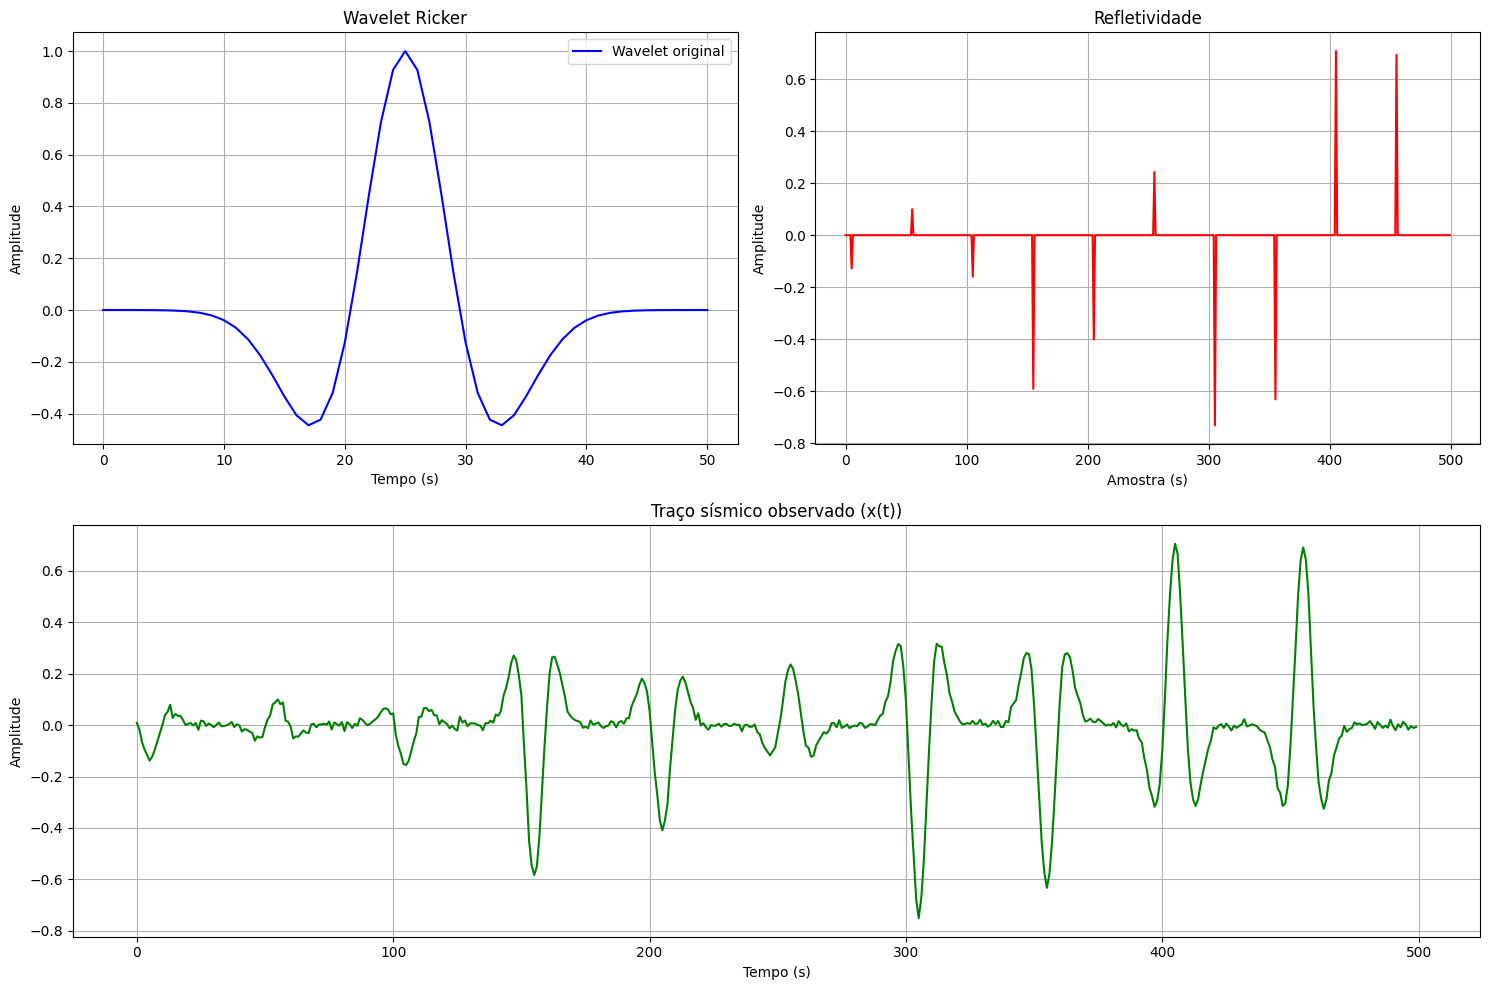

In [ ]:
import time

#seed
np.random.seed(2)


#Gerar Dados sísmicos sintéticos
#Vetor temporal para wavelet não causal
dt = 2e-3
t = np.arange(-0.05,0.05+dt,dt)
print(t.shape)


#Frequência central da wavelet de Ricker
f0 = 25


# Gerar a wavelet de Ricker
Wavelet = ricker_wavelet(f0, t)


# Gerar a resposta impulsiva
M = int(1/dt)
s = int(M/10)
r_original = gerar_reletividade_aleatoria(M,s)

# Convoluir a wavelet com a refletividade para gerar o traço sísmico sintético
x = np.convolve(r_original, Wavelet, mode='same')

N_full = len(x)

# Adicionar Ruído ao traço sísmico
std_noise = 0.01
noise_1 = np.random.normal(0, std_noise, N_full )

percet = 0.998
np.random.seed(938479)
noise_2 = np.where(np.random.rand(N_full) < percet,
                         np.random.randn(N_full) * std_noise,
                         np.random.randn(N_full) * std_noise + 10)

x += noise_1
# x += noise_2





##################################### Figuras ##################################
plt.figure(figsize=(15, 10))

# Plotar no primeiro subplot (1ª posição)
plt.subplot(221)  # 2 linhas, 2 colunas, 1ª posição
plt.plot(Wavelet, color='b',label = 'Wavelet original')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Wavelet Ricker')
plt.grid()

# Plotar no segundo subplot (2ª posição)
plt.subplot(222)  # 2 linhas, 2 colunas, 2ª posição
plt.plot(r_original, color='r')
plt.title('Refletividade')
plt.xlabel('Amostra (s)')
plt.ylabel('Amplitude')
plt.grid()

# Plotar no terceiro subplot que ocupa 2 posições (3ª e 4ª)
# plt.subplot(223)  # 2 linhas, 2 colunas, 3ª posição
plt.subplot2grid((2, 2), (1, 0), colspan=2)  # Ocupa a linha 2 e as 2 colunas
plt.plot( x, color='g')
plt.title('Traço sísmico observado (x(t))')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid()

# Ajustar o layout para evitar sobreposições
plt.tight_layout()
plt.show()


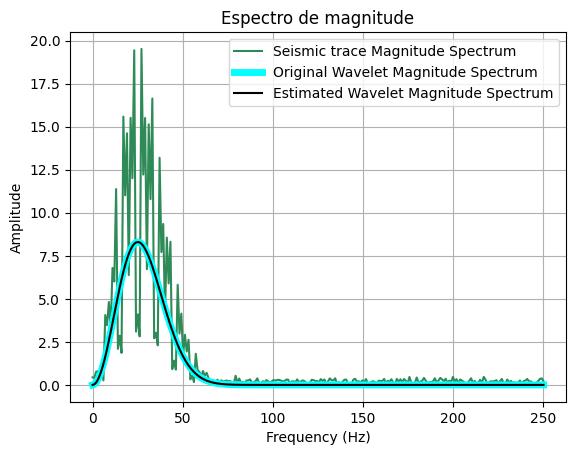

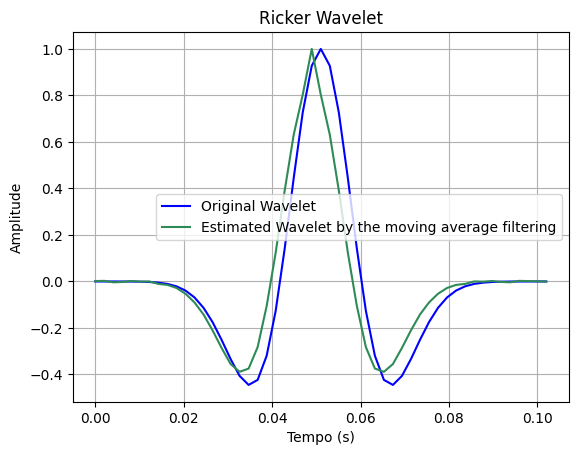

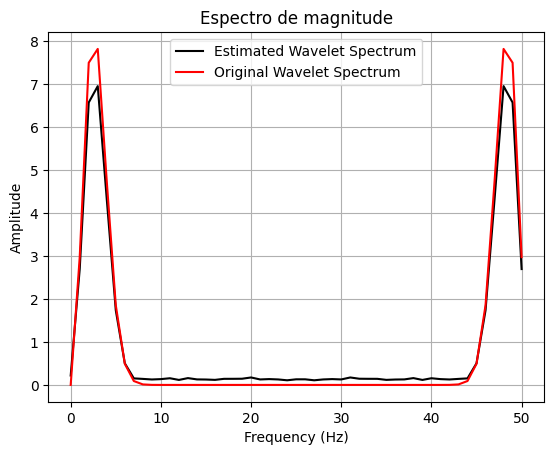

In [ ]:

L = len(Wavelet)
w_est = estimate_wavelet(x,L,5)



N = len(x)

X_f = np.abs( (np.fft.fft(x)) )[0:N//2]
W_f = np.abs( (np.fft.fft(Wavelet,N)) )[0:N//2]
W_f_est = np.abs( np.fft.fft(w_est) )[0:N//2]

f_axis = np.linspace(0,1/(2*dt),N//2)


plt.subplots()
plt.plot(f_axis,X_f, color='seagreen',label = 'Seismic trace Magnitude Spectrum')
plt.plot(f_axis,W_f, color='cyan',label = 'Original Wavelet Magnitude Spectrum',linewidth = 5)
plt.plot(f_axis,W_f, color='black',label = 'Estimated Wavelet Magnitude Spectrum')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Espectro de magnitude')
plt.grid()




W_f = np.abs( np.fft.fft(Wavelet) )

t_axis = np.linspace(0,L*dt,L)
plt.subplots()
plt.plot(t_axis, Wavelet, color='b',label = 'Original Wavelet')
plt.plot(t_axis, w_est, color='seagreen',label = 'Estimated Wavelet by the moving average filtering')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Ricker Wavelet')
plt.grid()

W_f_est = np.abs( np.fft.fft(w_est) )


plt.subplots()
plt.plot(W_f_est, color='black',label = 'Estimated Wavelet Spectrum')
plt.plot(W_f, color='red',label = 'Original Wavelet Spectrum')

plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Espectro de magnitude')
plt.grid()


##**Minimium $l_1$ norm deconv**

In [ ]:
#################################### Parâmetros Loop ###########################
#################################### Parâmetros Loop ###########################
n_iter = 40
mu = 45
omega_0 = 2*np.pi*f0
Q_vector = np.array([100000])
L = len(Wavelet)
M = 10




# start_time = time.time()  # Início


# r_est, J_r = l1_norm_atenuated_deconvolution(x,Wavelet,omega_0,
#                                               Q_vector, dt, n_iter ,mu )

# end_time = time.time()  # Início

# execution_time = end_time - start_time

# print(f"Tempo de execução da deconvolução por máxima correntropia: {execution_time} segundos")





#Deconvolução cega
start_time = time.time()  # Início


r_est_blind,w_est,J_r = blind_l1_norm_atenuated_deconvolution(x, L, M, omega_0,
                                              Q_vector, 10*dt, n_iter ,mu )

end_time = time.time()  # Início

execution_time = end_time - start_time

print(f"Tempo de execução da deconvolução por norma l1 com fator Q: {execution_time} segundos")


#################################### Parâmetros Loop ###########################
#################################### Parâmetros Loop ###########################



# Plot dos resultados
t_ro = np.arange(0,len(r_original)*dt,dt)
t_r = np.arange(0,len(r_est_blind)*dt,dt)
t_x = np.arange(0,len(x)*dt,dt)




Tempo de execução da deconvolução por norma l1 com fator Q: 18.459739208221436 segundos


##**Plotagem dos gráficos**

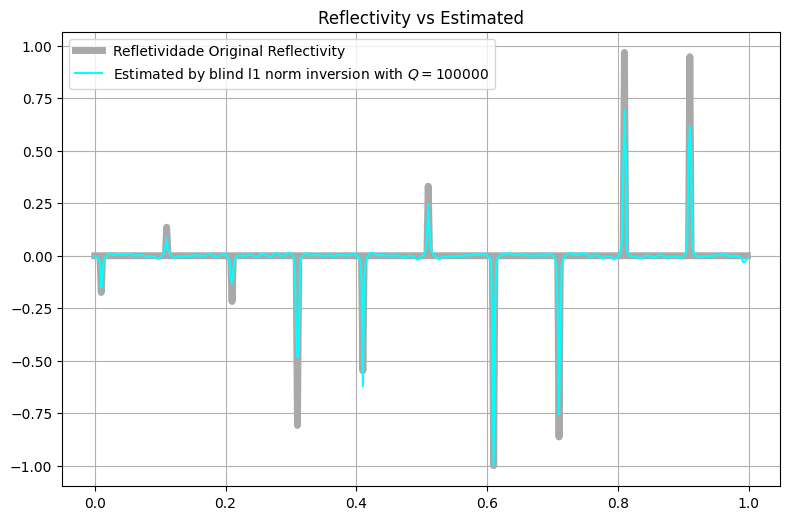

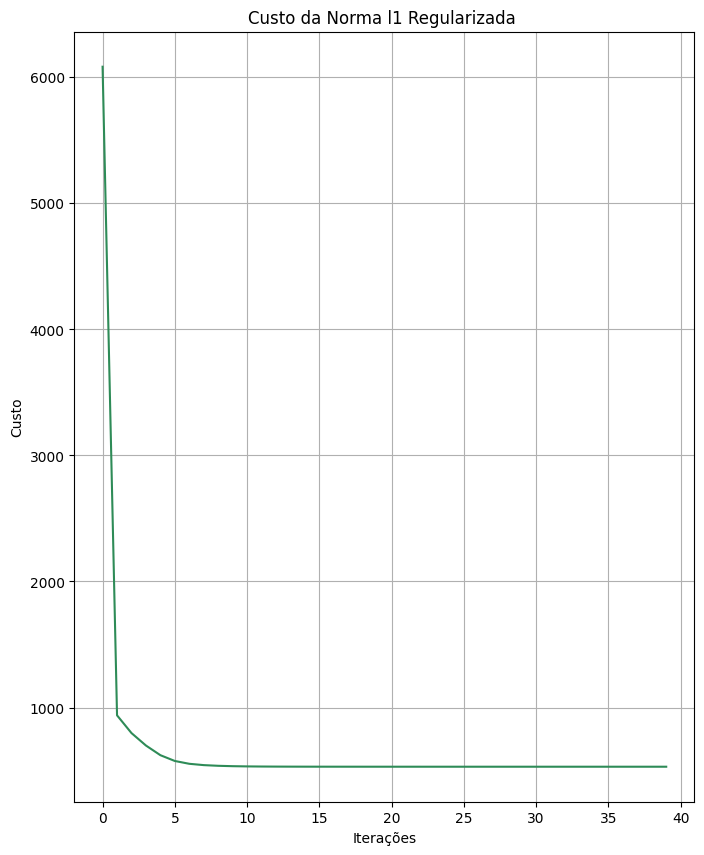

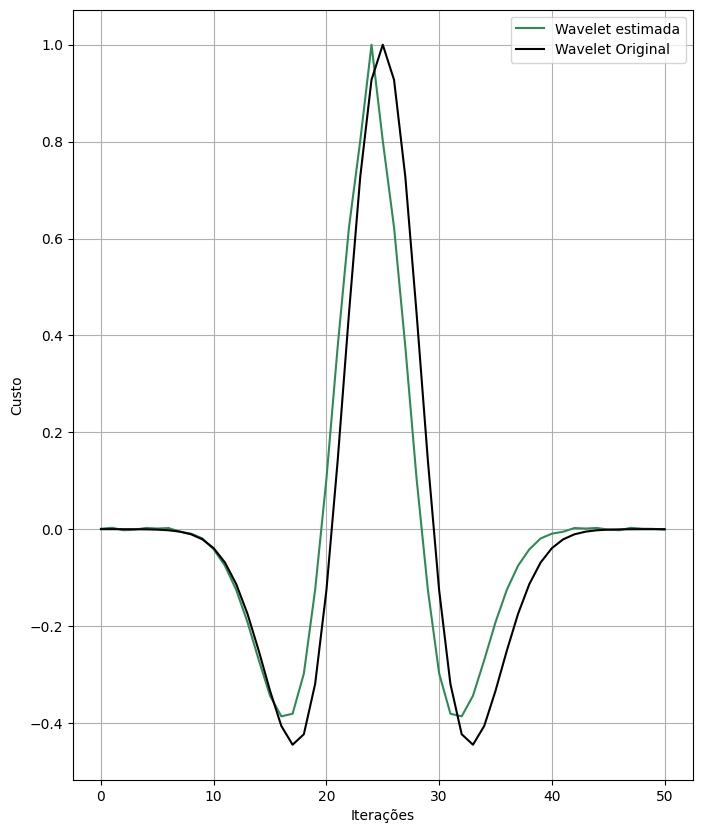

In [ ]:
#Normalização para a exibição

r_est_blind_n = np.roll( r_est_blind[::-1] ,L//2)/np.max(np.abs(r_est_blind))
# r_est_n = r_est/np.max(r_est)
r_originaln = r_original/np.max(np.abs(r_original))


largura = 8
altura = 10

#Plotando refletividade e refletividade estimada
fig = plt.figure(figsize=(largura, altura))
plt.subplot(2, 1, 1)  # 1 linha, 2 colunas, 1º gráfico
plt.plot(t_ro,r_originaln, label='Refletividade Original Reflectivity', color="darkgray",linewidth = 5)
# plt.plot(r_est_n, label=f'Estimado pela inversão da norma l1', color="seagreen",linewidth = 4)
plt.plot(t_r, r_est_blind_n, label=f'Estimated by blind l1 norm inversion with $Q = {Q_vector[0]}$', color="cyan")
plt.grid()
plt.legend()

plt.title('Reflectivity vs Estimated')

# Ajuste para layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()




fig2 = plt.figure(figsize=(largura, altura))


# Plot the correntropy cost function
plt.plot(J_r, color = 'seagreen')
plt.title(f'Custo da Norma l1 Regularizada ')
plt.xlabel('Iterações')
plt.ylabel('Custo')
plt.grid()
plt.show()



fig3 = plt.figure(figsize=(largura, altura))


# Plot the correntropy cost function
plt.plot(w_est, color = 'seagreen',label = 'Wavelet estimada')
plt.plot(Wavelet, color = 'black',label = 'Wavelet Original')
plt.legend()
plt.xlabel('Iterações')
plt.ylabel('Custo')
plt.grid()
plt.show()






##**Gerando traço sísmico com atenuação**

##**Deconvolução em meio atenuante**

##**Plotagem dos gráficos**

##**Norma L1 e aproximações**

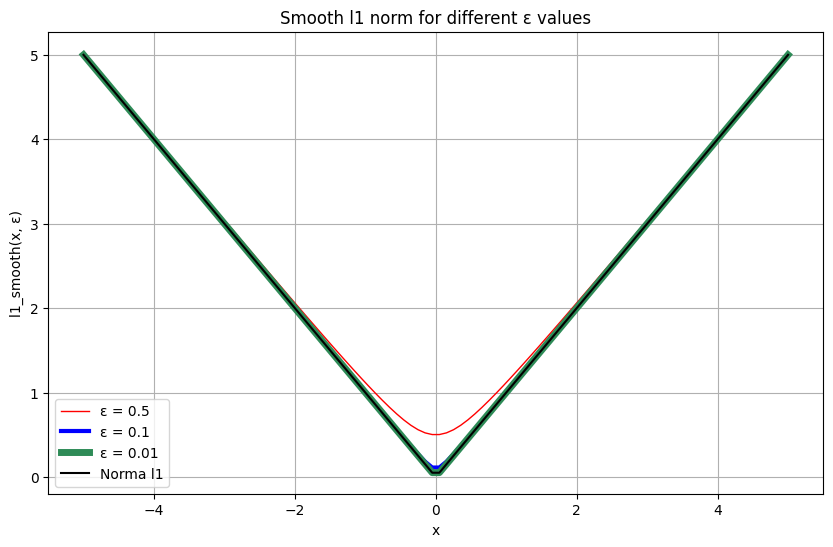

In [ ]:
def l1_smooth(v,eps):
    l1_v = np.sqrt(v**2 + eps**2)
    return l1_v

def l1_norm(v):
    l1_v = np.abs(v)
    return l1_v


eps = np.array([0.5,0.1,0.01])
x_vector = np.linspace(-5,5,100)
y = np.array([l1_smooth(x_vector, e) for e in eps]) # Cria a matriz y usando list comprehension
y_real = l1_norm(x_vector)

# Cores para cada valor de epsilon
colors = ['red', 'blue', 'seagreen']

# Plotagem
plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura para melhor visualização

for i, e in enumerate(eps):
    plt.plot(x_vector, y[i], label=f'ε = {e}', color=colors[i], linewidth = 2*i + 1)  # y[i] acessa a linha i da matriz y

plt.plot(x_vector,y_real, color = "black", label = f'Norma l1')
plt.title('Smooth l1 norm for different ε values')
plt.xlabel('x')
plt.ylabel('l1_smooth(x, ε)')
plt.legend()
plt.grid(True)  # Adiciona um grid para melhor visualização
plt.show()

